In [59]:
# Python
import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt
from tqdm import tqdm
%matplotlib inline

In [12]:
df = pd.read_csv('../data/train.csv', parse_dates=[0])
df.info()
df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null datetime64[ns]
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


date     1826
store      10
item       50
sales     213
dtype: int64

In [13]:
df.head()

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10


In [39]:
d = df.copy().query('store == 1 & item == 1')
# d = d[['date','sales']]
# d.columns = ['ds', 'y']
d.rename({'date': 'ds', 'sales': 'y'}, axis=1, inplace=True)

CPU times: user 10.3 s, sys: 959 ms, total: 11.3 s
Wall time: 4.41 s


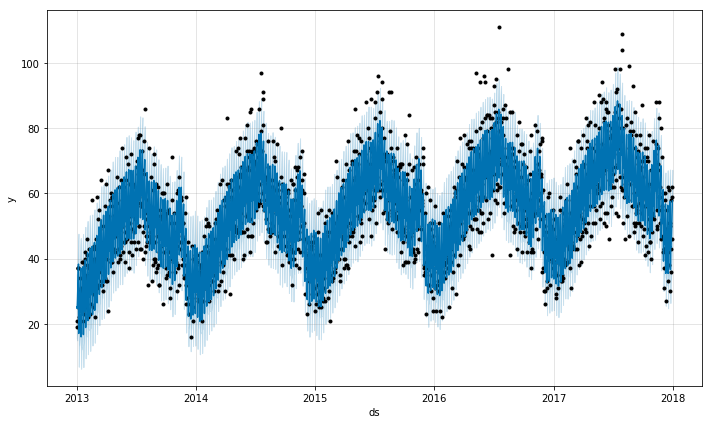

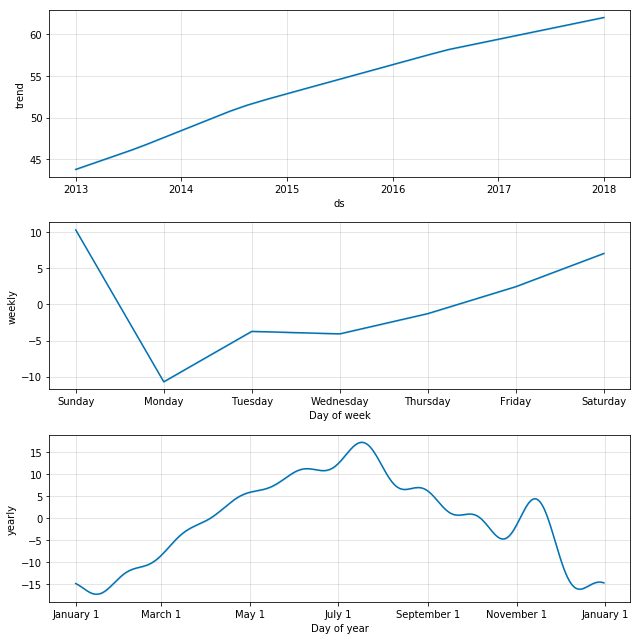

In [80]:
%%time
# Python
m = Prophet(yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False)
m.fit(d)

# Python
future = m.make_future_dataframe(periods=365)
future.tail()

# Python
forecast = m.predict()
# forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

fig1 = m.plot(forecast)
fig2 = m.plot_components(forecast)

In [26]:
df_sub = df[(df.store < 5) & (df.item < 10)]

In [74]:
import itertools

stores = df_sub.store.unique()
items = df_sub.item.unique()

res_all = []
for i, j in tqdm(itertools.product(stores, items)):
    d = df_sub.copy().loc[(df_sub.store == i) & (df_sub.item == j)]
    d.rename({'date': 'ds', 'sales': 'y'}, axis=1, inplace=True)
    
    m = Prophet(yearly_seasonality=True,
            weekly_seasonality=True,
            daily_seasonality=False)
    m.fit(d)
    res = m.predict()
    
    res_all.append(d.merge(res, on='ds'))
    
res_all = pd.concat(res_all)






0it [00:00, ?it/s]




1it [00:03,  3.74s/it]




2it [00:07,  3.77s/it]




3it [00:11,  3.72s/it]




4it [00:15,  3.79s/it]




5it [00:19,  3.84s/it]




6it [00:23,  3.86s/it]




7it [00:26,  3.87s/it]




8it [00:30,  3.83s/it]




9it [00:34,  3.80s/it]




10it [00:38,  3.76s/it]




11it [00:41,  3.76s/it]




12it [00:45,  3.76s/it]




13it [00:49,  3.82s/it]




14it [00:53,  3.86s/it]




15it [00:57,  4.03s/it]




16it [01:01,  4.03s/it]




17it [01:06,  4.12s/it]




18it [01:10,  4.08s/it]




19it [01:14,  4.16s/it]




20it [01:18,  4.11s/it]




21it [01:22,  4.11s/it]




22it [01:26,  4.02s/it]




23it [01:30,  3.97s/it]




24it [01:34,  3.96s/it]




25it [01:38,  3.92s/it]




26it [01:42,  3.92s/it]




27it [01:45,  3.84s/it]




28it [01:49,  3.79s/it]




29it [01:52,  3.74s/it]




30it [01:56,  3.74s/it]




31it [02:00,  3.71s/it]




32it [02:04,  3.71s/it]




33it [02:08,  3.78s/it]




34it [02:11,  3.77s/it]




35it [02:15,  3.84s/it]




3

In [77]:
res_all.to_pickle('../processed_data/prophet_res.pkl')

In [85]:
pd.read_pickle('../processed_data/prophet_res.pkl').dtypes

ds                            datetime64[ns]
store                                  int64
item                                   int64
y                                      int64
trend                                float64
yhat_lower                           float64
yhat_upper                           float64
trend_lower                          float64
trend_upper                          float64
additive_terms                       float64
additive_terms_lower                 float64
additive_terms_upper                 float64
weekly                               float64
weekly_lower                         float64
weekly_upper                         float64
yearly                               float64
yearly_lower                         float64
yearly_upper                         float64
multiplicative_terms                 float64
multiplicative_terms_lower           float64
multiplicative_terms_upper           float64
yhat                                 float64
dtype: obj